In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tsfresh
import datetime as dt

%matplotlib inline

## Task 1: Recording the Data

I will use my mobile device, Samsung S20 which will be located in my front pocket during measurements.

__Activity:__
- Burpees in my room, recorded for 3 minutes
- Jumping Jacks in my room, recorded for 3 minutes

## Task 2: Formatting the Data

In [3]:
burpee = pd.read_csv("Burpees.csv", names=("time", "ax", 'ay', 'az', '|a|'), skiprows=1).round(decimals=2)
jump = pd.read_csv("Jumping.csv", names=("time", "ax", 'ay', 'az', '|a|'), skiprows=1).round(decimals=2)

burpee.head()

,time,ax,ay,az,|a|
0,23:27:29:8510,-1.30,-0.08,1.80,2.22
1,23:27:29:8610,-1.03,0.09,1.22,1.60
2,23:27:29:8670,-0.77,0.28,0.03,0.82
3,23:27:29:8780,-0.47,0.52,-1.06,1.27
4,23:27:29:8950,-0.42,0.96,-1.07,1.50


In [4]:
burpee['dates'] = pd.Timestamp('2022-08-22')
jump['dates'] = pd.Timestamp('2022-08-22')

burpee['time'] = pd.to_datetime(burpee['dates'].astype(str) + ' ' + burpee['time'].astype(str), format='%Y-%m-%d %H:%M:%S:%f')
jump['time'] = pd.to_datetime(jump['dates'].astype(str) + ' ' + jump['time'].astype(str), format='%Y-%m-%d %H:%M:%S:%f')

burpee

,time,ax,ay,az,|a|,dates
0,2022-08-22 23:27:29.851000,-1.30,-0.08,1.80,2.22,2022-08-22
1,2022-08-22 23:27:29.861000,-1.03,0.09,1.22,1.60,2022-08-22
2,2022-08-22 23:27:29.867000,-0.77,0.28,0.03,0.82,2022-08-22
3,2022-08-22 23:27:29.878000,-0.47,0.52,-1.06,1.27,2022-08-22
4,2022-08-22 23:27:29.895000,-0.42,0.96,-1.07,1.50,2022-08-22
...,...,...,...,...,...,...
17885,2022-08-22 23:30:28.683000,1.75,-1.69,-0.26,2.45,2022-08-22
17886,2022-08-22 23:30:28.691900,1.87,-1.42,-0.43,2.38,2022-08-22
17887,2022-08-22 23:30:28.702000,1.52,-1.06,-0.83,2.03,2022-08-22
17888,2022-08-22 23:30:28.720000,-0.47,0.23,-1.02,1.14,2022-08-22


In [5]:
burpee.drop('dates', axis=1, inplace=True)
jump.drop('dates', axis=1, inplace=True)

In [6]:
burpee.head()

,time,ax,ay,az,|a|
0,2022-08-22 23:27:29.851,-1.30,-0.08,1.80,2.22
1,2022-08-22 23:27:29.861,-1.03,0.09,1.22,1.60
2,2022-08-22 23:27:29.867,-0.77,0.28,0.03,0.82
3,2022-08-22 23:27:29.878,-0.47,0.52,-1.06,1.27
4,2022-08-22 23:27:29.895,-0.42,0.96,-1.07,1.50


In [7]:
jump.head()

,time,ax,ay,az,|a|
0,2022-08-22 17:28:42.408900,0.17,-0.11,-0.55,0.59
1,2022-08-22 17:28:42.416000,0.21,-0.20,-0.49,0.57
2,2022-08-22 17:28:42.423000,0.31,-0.09,0.10,0.34
3,2022-08-22 17:28:42.434000,0.18,-0.05,0.55,0.58
4,2022-08-22 17:28:42.444000,-0.06,-0.13,0.32,0.35


## Task 3: Visualising the Data

__Plotting Burpee activity__

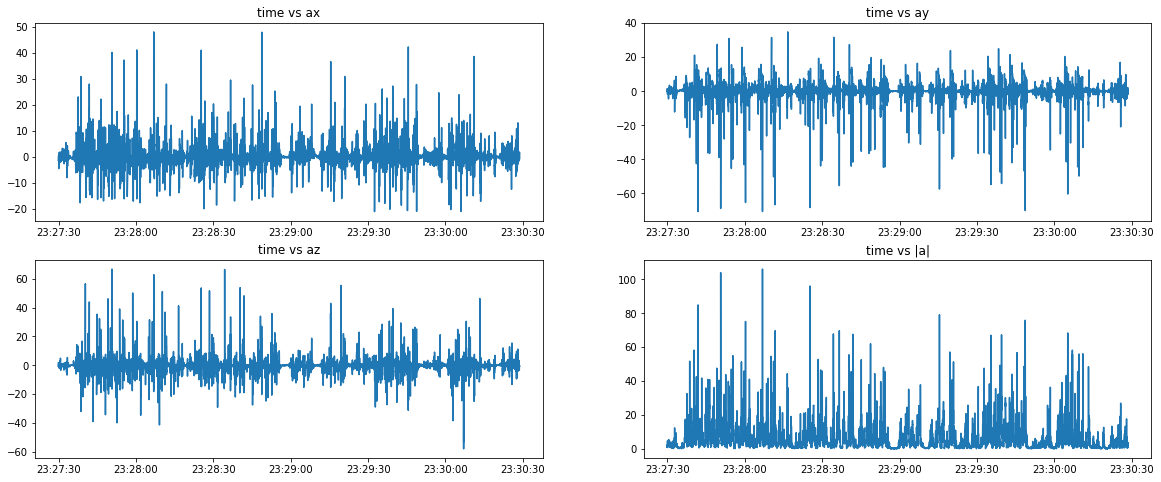

In [8]:
fig = plt.figure(figsize=(20,8))

a = plt.subplot(2, 2, 1)
a.set_title("time vs ax")
plt.plot(burpee['time'], burpee['ax'])

b = plt.subplot(2, 2, 2)
b.set_title("time vs ay")
plt.plot(burpee['time'], burpee['ay'])

c = plt.subplot(2, 2, 3)
c.set_title("time vs az")
plt.plot(burpee['time'], burpee['az'])

d = plt.subplot(2, 2, 4)
d.set_title("time vs |a|")
plt.plot(burpee['time'], burpee['|a|'])

plt.show()

__Plotting Jumping Jacks activity__

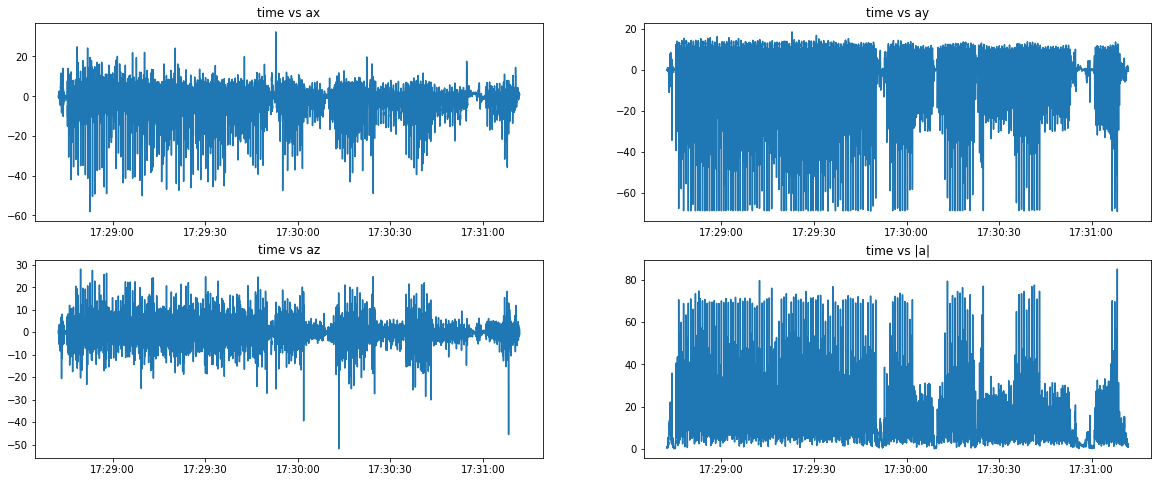

In [9]:
fig = plt.figure(figsize=(20,8))

a = plt.subplot(2, 2, 1)
a.set_title("time vs ax")
plt.plot(jump['time'], jump['ax'])

b = plt.subplot(2, 2, 2)
b.set_title("time vs ay")
plt.plot(jump['time'], jump['ay'])

c = plt.subplot(2, 2, 3)
c.set_title("time vs az")
plt.plot(jump['time'], jump['az'])

d = plt.subplot(2, 2, 4)
d.set_title("time vs |a|")
plt.plot(jump['time'], jump['|a|'])

plt.show()

__Comparing Jumping Jacks and Burpee Signals__

JJ's and Burpees are dependent on a personal's physical fitness, so JJ's show plenty of movement in both x, y and z directions. Burpees on the other hand had points of high movements, but also periods of rest. Burpee's are much more physically demanding (especially for 3 minutes), relative to JJ's which can be reflected in the lack of rest/breaks in the signals. Signal readings for both Burpee's and JJ's appear to be relatively consistent. 

Transition times at the beginning is around about 3-4 seconds long.

## Task 4: Preprocessing the Data

In [10]:
date1 = pd.Series(pd.date_range('00:00:00', periods = len(burpee.index), freq = 'L'))
date2 = pd.Series(pd.date_range('00:00:00', periods = len(jump.index), freq = 'L'))

burpee['delta_t'] = date1.dt.time
jump['delta_t'] = date2.dt.time

burpee

,time,ax,ay,az,|a|,delta_t
0,2022-08-22 23:27:29.851000,-1.30,-0.08,1.80,2.22,00:00:00
1,2022-08-22 23:27:29.861000,-1.03,0.09,1.22,1.60,00:00:00.001000
2,2022-08-22 23:27:29.867000,-0.77,0.28,0.03,0.82,00:00:00.002000
3,2022-08-22 23:27:29.878000,-0.47,0.52,-1.06,1.27,00:00:00.003000
4,2022-08-22 23:27:29.895000,-0.42,0.96,-1.07,1.50,00:00:00.004000
...,...,...,...,...,...,...
17885,2022-08-22 23:30:28.683000,1.75,-1.69,-0.26,2.45,00:00:17.885000
17886,2022-08-22 23:30:28.691900,1.87,-1.42,-0.43,2.38,00:00:17.886000
17887,2022-08-22 23:30:28.702000,1.52,-1.06,-0.83,2.03,00:00:17.887000
17888,2022-08-22 23:30:28.720000,-0.47,0.23,-1.02,1.14,00:00:17.888000


In [11]:
x=burpee.drop(burpee.index[0:800]) # dropping rows by inspection/eyeballing
y=jump.drop(jump.index[0:800])

In [12]:
x

,time,ax,ay,az,|a|,delta_t
800,2022-08-22 23:27:37.849000,-2.38,1.03,1.26,2.88,00:00:00.800000
801,2022-08-22 23:27:37.857000,-2.04,1.00,0.68,2.37,00:00:00.801000
802,2022-08-22 23:27:37.874000,-1.62,0.97,0.12,1.90,00:00:00.802000
803,2022-08-22 23:27:37.876000,-1.32,0.84,-0.35,1.61,00:00:00.803000
804,2022-08-22 23:27:37.892000,-1.08,0.62,-0.80,1.48,00:00:00.804000
...,...,...,...,...,...,...
17885,2022-08-22 23:30:28.683000,1.75,-1.69,-0.26,2.45,00:00:17.885000
17886,2022-08-22 23:30:28.691900,1.87,-1.42,-0.43,2.38,00:00:17.886000
17887,2022-08-22 23:30:28.702000,1.52,-1.06,-0.83,2.03,00:00:17.887000
17888,2022-08-22 23:30:28.720000,-0.47,0.23,-1.02,1.14,00:00:17.888000


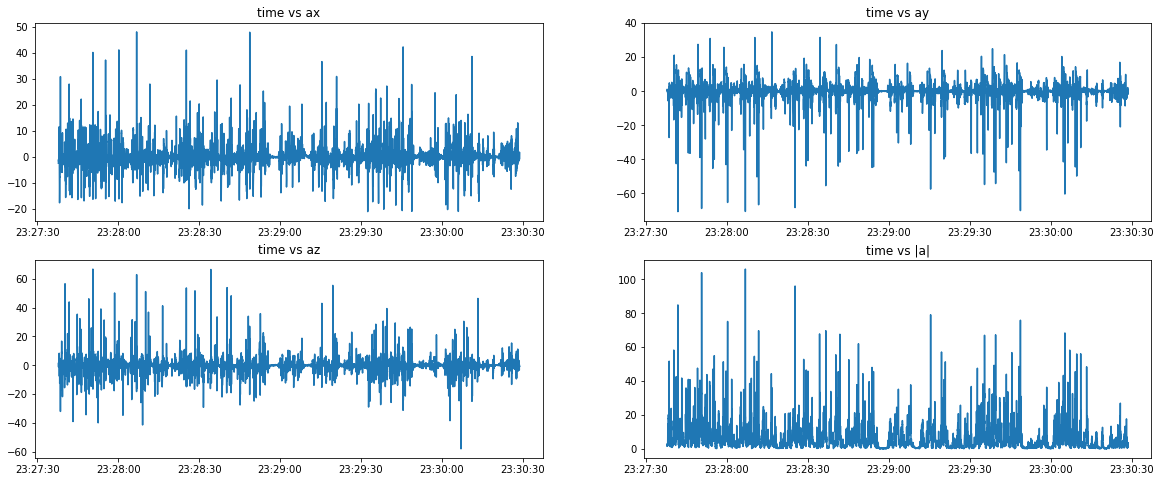

In [13]:
ig = plt.figure(figsize=(20,8))

a = plt.subplot(2, 2, 1)
a.set_title("time vs ax")
plt.plot(x['time'], x['ax'])

b = plt.subplot(2, 2, 2)
b.set_title("time vs ay")
plt.plot(x['time'], x['ay'])

c = plt.subplot(2, 2, 3)
c.set_title("time vs az")
plt.plot(x['time'], x['az'])

d = plt.subplot(2, 2, 4)
d.set_title("time vs |a|")
plt.plot(x['time'], x['|a|'])

plt.show()

The length of the remaining signals (in seconds):

In [14]:
(x.iloc[-1].delta_t.second + x.iloc[-1].delta_t.microsecond / 1e+6) - (x.iloc[0].delta_t.second + x.iloc[0].delta_t.microsecond / 1e+6)

17.089

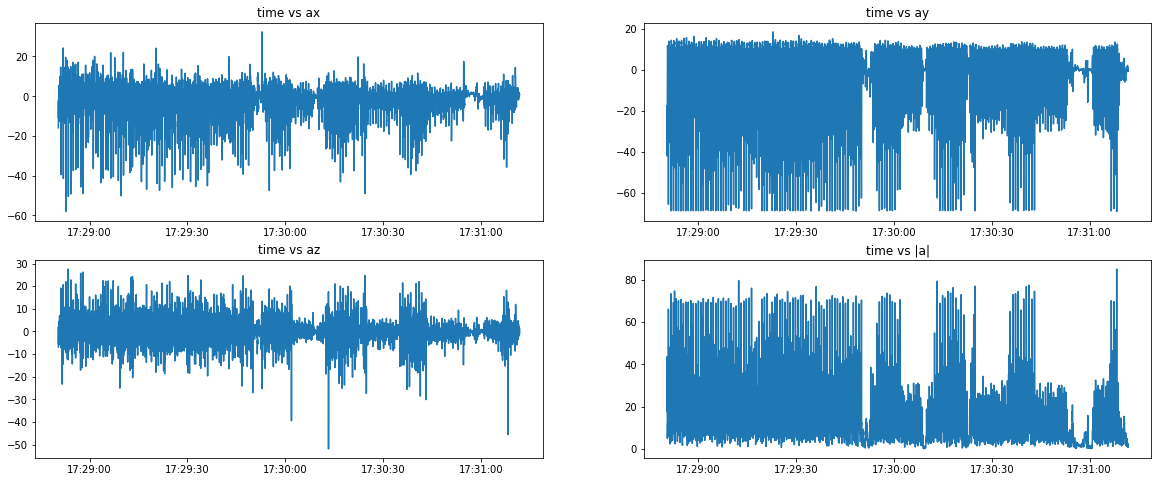

In [15]:
fig = plt.figure(figsize=(20,8))

a = plt.subplot(2, 2, 1)
a.set_title("time vs ax")
plt.plot(y['time'], y['ax'])

b = plt.subplot(2, 2, 2)
b.set_title("time vs ay")
plt.plot(y['time'], y['ay'])

c = plt.subplot(2, 2, 3)
c.set_title("time vs az")
plt.plot(y['time'], y['az'])

d = plt.subplot(2, 2, 4)
d.set_title("time vs |a|")
plt.plot(y['time'], y['|a|'])

plt.show()

### Task 5: Extract

In [16]:
for i in range(len(jump) // 100):
    jump['letter'] = 'j'
    
    for j in range(100):
        jump['num'] = np.arange(len(jump)) // 100
    
a = np.char.array(jump['letter'].values)
b = np.char.array(jump['num'].values)

jump['window_idx'] = (a + b'' + b).astype(str)
jump

,time,ax,ay,az,|a|,delta_t,letter,num,window_idx
0,2022-08-22 17:28:42.408900,0.17,-0.11,-0.55,0.59,00:00:00,j,0,j0
1,2022-08-22 17:28:42.416000,0.21,-0.20,-0.49,0.57,00:00:00.001000,j,0,j0
2,2022-08-22 17:28:42.423000,0.31,-0.09,0.10,0.34,00:00:00.002000,j,0,j0
3,2022-08-22 17:28:42.434000,0.18,-0.05,0.55,0.58,00:00:00.003000,j,0,j0
4,2022-08-22 17:28:42.444000,-0.06,-0.13,0.32,0.35,00:00:00.004000,j,0,j0
...,...,...,...,...,...,...,...,...,...
14936,2022-08-22 17:31:11.802000,0.91,-0.67,1.29,1.71,00:00:14.936000,j,149,j149
14937,2022-08-22 17:31:11.811000,0.64,-0.08,1.59,1.71,00:00:14.937000,j,149,j149
14938,2022-08-22 17:31:11.821000,0.61,-0.25,0.38,0.76,00:00:14.938000,j,149,j149
14939,2022-08-22 17:31:11.832000,0.88,-0.29,-0.45,1.03,00:00:14.939000,j,149,j149


In [18]:
for i in range(len(burpee) // 100):
    burpee['letter'] = 'b'
    
    for j in range(100):
        burpee['num'] = np.arange(len(burpee)) // 100

a = np.char.array(burpee['letter'].values)
b = np.char.array(burpee['num'].values)

burpee['window_idx'] = (a + b'' + b).astype(str)
burpee

,time,ax,ay,az,|a|,delta_t,letter,num,window_idx
0,2022-08-22 23:27:29.851000,-1.30,-0.08,1.80,2.22,00:00:00,b,0,b0
1,2022-08-22 23:27:29.861000,-1.03,0.09,1.22,1.60,00:00:00.001000,b,0,b0
2,2022-08-22 23:27:29.867000,-0.77,0.28,0.03,0.82,00:00:00.002000,b,0,b0
3,2022-08-22 23:27:29.878000,-0.47,0.52,-1.06,1.27,00:00:00.003000,b,0,b0
4,2022-08-22 23:27:29.895000,-0.42,0.96,-1.07,1.50,00:00:00.004000,b,0,b0
...,...,...,...,...,...,...,...,...,...
17885,2022-08-22 23:30:28.683000,1.75,-1.69,-0.26,2.45,00:00:17.885000,b,178,b178
17886,2022-08-22 23:30:28.691900,1.87,-1.42,-0.43,2.38,00:00:17.886000,b,178,b178
17887,2022-08-22 23:30:28.702000,1.52,-1.06,-0.83,2.03,00:00:17.887000,b,178,b178
17888,2022-08-22 23:30:28.720000,-0.47,0.23,-1.02,1.14,00:00:17.888000,b,178,b178


In [19]:
burpee.drop(['letter', 'num'], axis=1, inplace=True)
jump.drop(['letter', 'num'], axis=1, inplace=True)

#### Dimensions of Burpee and JJ's data (Before Concatenation)

In [23]:
burpee.shape

(17890, 7)

In [24]:
jump.shape

(14941, 7)

In [20]:
z = pd.concat([jump,burpee])
z

,time,ax,ay,az,|a|,delta_t,window_idx
0,2022-08-22 17:28:42.408900,0.17,-0.11,-0.55,0.59,00:00:00,j0
1,2022-08-22 17:28:42.416000,0.21,-0.20,-0.49,0.57,00:00:00.001000,j0
2,2022-08-22 17:28:42.423000,0.31,-0.09,0.10,0.34,00:00:00.002000,j0
3,2022-08-22 17:28:42.434000,0.18,-0.05,0.55,0.58,00:00:00.003000,j0
4,2022-08-22 17:28:42.444000,-0.06,-0.13,0.32,0.35,00:00:00.004000,j0
...,...,...,...,...,...,...,...
17885,2022-08-22 23:30:28.683000,1.75,-1.69,-0.26,2.45,00:00:17.885000,b178
17886,2022-08-22 23:30:28.691900,1.87,-1.42,-0.43,2.38,00:00:17.886000,b178
17887,2022-08-22 23:30:28.702000,1.52,-1.06,-0.83,2.03,00:00:17.887000,b178
17888,2022-08-22 23:30:28.720000,-0.47,0.23,-1.02,1.14,00:00:17.888000,b178


#### Dimensions of Burpee and JJ's, after concat

In [26]:
z.shape

(32831, 7)

#### Number of unique values of column `window_idx`

In [21]:
(len(jump) // 100) + (len(burpee) // 100) # 327 unique values of window_idx have been generated

327

#### Extracting Features

In [27]:
from tsfresh.feature_extraction import extract_features

z['time']=pd.to_datetime(z['time'])

X = extract_features(z, column_id='window_idx')

Feature Extraction:   0%|                                                                       | 0/20 [00:06<?, ?it/s]


UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('<M8[ns]')